In [3]:
%%capture
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [10]:
#etfs list
etfs_lst = ['IYR', 'IYZ', 'XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etfsPrices = yf.download(etfs_lst,start="2014-01-01")['Adj Close'] 

[*********************100%***********************]  11 of 11 completed


In [11]:
#returns of all etfs
returns=etfsPrices.pct_change()
returns=returns.dropna()

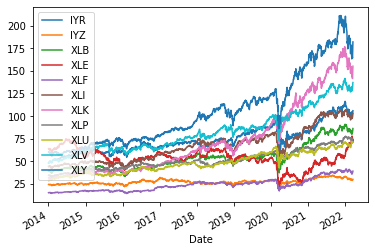

In [14]:
etfsPrices.plot()

In [15]:
!pip install PyPortfolioOpt
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov, CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
import pypfopt as pf
from pypfopt import plotting

     |████████████████████████████████| 61 kB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 2.8 MB 10.6 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [28]:
import itertools as it

In [30]:
# getting all the combination of 3 etfs for the complete list of ets 
# sample 10 combination
[i for i in it.combinations(etfs_lst,3)][:10]

[('IYR', 'IYZ', 'XLB'),
 ('IYR', 'IYZ', 'XLE'),
 ('IYR', 'IYZ', 'XLF'),
 ('IYR', 'IYZ', 'XLI'),
 ('IYR', 'IYZ', 'XLK'),
 ('IYR', 'IYZ', 'XLP'),
 ('IYR', 'IYZ', 'XLU'),
 ('IYR', 'IYZ', 'XLV'),
 ('IYR', 'IYZ', 'XLY'),
 ('IYR', 'XLB', 'XLE')]

In [32]:
# total combination
all_combination=[i for i in it.combinations(etfs_lst,3)]
len(all_combination)

165

Sample 3-ETF portfolios for the ETFs combination ('IYR', 'IYZ', 'XLB')


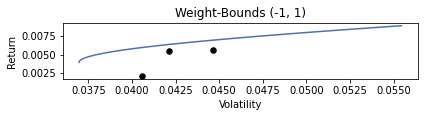

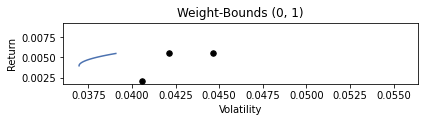

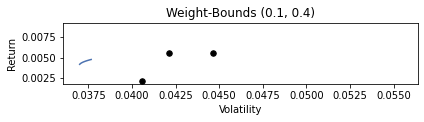

________________________________________________________________________________
Sample 3-ETF portfolios for the ETFs combination ('XLB', 'XLK', 'XLU')


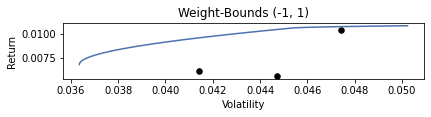

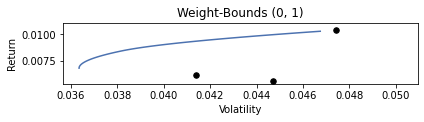

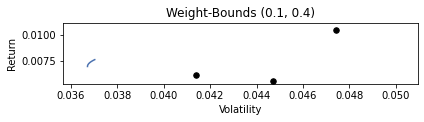

________________________________________________________________________________
Sample 3-ETF portfolios for the ETFs combination ('XLI', 'XLK', 'XLP')


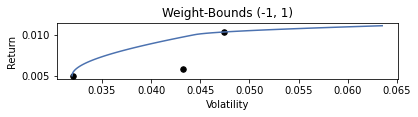

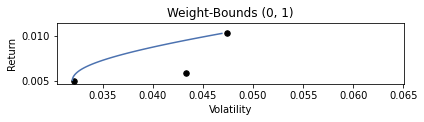

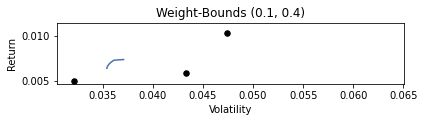

________________________________________________________________________________


In [46]:
#plot 3-ETF portfolios
for j in [0,100,145]:
    print("Sample 3-ETF portfolios for the ETFs combination",all_combination[j])
    i = np.array(all_combination[j])
    ax1 = plt.subplot(311)
    ax1.set_title('Weight-Bounds (-1, 1)')
    plotting.plot_efficient_frontier(EfficientFrontier(mean_historical_return(returns[i], returns_data=True, compounding=False, frequency=12), CovarianceShrinkage(returns[i], returns_data=True, frequency=12).ledoit_wolf(), weight_bounds = (-1,1)), ax = ax1)
    ax1.get_legend().remove()
    plt.show()

    ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
    ax2.set_title('Weight-Bounds (0, 1)')
    plotting.plot_efficient_frontier(EfficientFrontier(mean_historical_return(returns[i], returns_data=True, compounding=False, frequency=12), CovarianceShrinkage(returns[i], returns_data=True, frequency=12).ledoit_wolf(), weight_bounds = (0,1)), ax = ax2)
    ax2.get_legend().remove()
    plt.show()


    ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
    ax3.set_title('Weight-Bounds (0.1, 0.4)')
    plotting.plot_efficient_frontier(EfficientFrontier(mean_historical_return(returns[i], returns_data=True, compounding=False, frequency=12), CovarianceShrinkage(returns[i], returns_data=True, frequency=12).ledoit_wolf(), weight_bounds = (0.1,0.4)), ax = ax3)
    ax3.get_legend().remove()
    plt.show()

    print("________________________________________________________________________________")


The EF with no constraints provides the widest range of returns and volatility. Because negative holding permits for short holdings, this is the case. Volatility rises in tandem with greater rewards.The capital required for a no-constraint portfolio should be substantially larger than for a long-only portfolio due to the leverage given by short holdings. The increasing cost of borrowing capital should be considered into the portfolio construction of the asset manager. This indicates that instead of a constant risk-free interest rate, a higher borrowing rate may be necessary in the optimization.The long-only EF is roughly the left part of the no-constraint EF because the EF return cannot exceed the largest return of the underlying three ETFs. For any goal volatility, the best feasible return for long-only EF is somewhat lower than the highest potential return for no-constraint EF (x-axis). The min-max (0.1-0.4) EF has a substantially narrower range of return volatility due to the set range of weights. The use of weight limitations could lead to a more stable EF portfolio. This could be a beneficial feature given the ambiguity around the input assumptions (expected return and covariance).Weight bounds may be required due to fiduciary responsibility, which requires the asset manager to advise the client on investment strategy while taking into consideration any investment constraints the client may have.
